## Problem #5

In [244]:
import numpy as np
import pandas as pd
%matplotlib inline  

In [189]:
# Define Constants
occupancy = 250 # in people

eRate = (1135*10**9) * (occupancy / 100) * (1/30) * (1/24) * \
    (1/60) * (1/60)  # in μg/second
    
chlorineRatio = 0.1 # fraction of the waste, by weight, that 
                    # consists of chlorinated plastics

pccdRatio = 0.001 # fraction of the mass of chlorinated 
                  # plastics that is released as PCDD

stackHeight = 20 # in meters
windSpeed = 3 # in m/s

#### (a) Plot the ground-level concentration vs distance, x, downwind (y=0) of the source. 


In [202]:
x = [i+1 for i in range(10000)]
y = [0 for i in range(10000)]
z = [0 for i in range(10000)]

In [203]:
data = pd.DataFrame()
data["x"] = x
data["y"] = y
data["z"] = z
data["sigmaY"] = 0.23*data["x"]**0.855 # in meters
data["sigmaZ"] = 0.076*data["x"]**0.879 # in meters
data["C"] = ((eRate*chlorineRatio*pccdRatio)/(2*np.pi*windSpeed* \
    data["sigmaY"]*data["sigmaZ"]))*np.exp(-data["y"]**2/(2* \
    data["sigmaY"]**2))*(np.exp(-(data["z"]-stackHeight)**2 \
    /(2*data["sigmaZ"]**2))+np.exp(-(data["z"]+
    stackHeight)**2/(2*data["sigmaZ"]**2)))

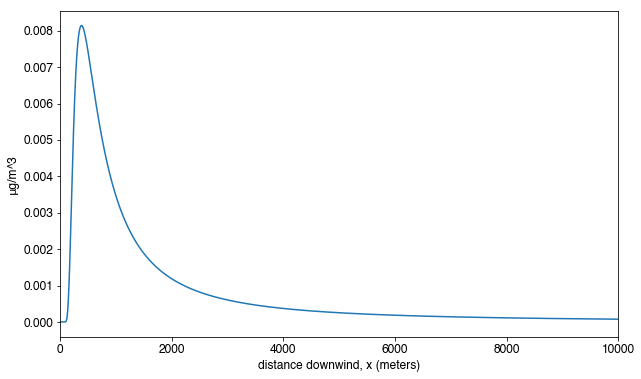

In [204]:
ax = data["C"].plot(figsize=(10,6), fontsize=12)
ax.set_xlabel("distance downwind, x (meters)", fontsize=12)
ax.set_ylabel("μg/m^3", fontsize=12);

#### (b) At the position, x-max, of the maximum ground-level concentration, plot the ground level concentration vs cross-wind distance, y.

In [205]:
# What is x-max?
data[data["C"] == max(data["C"])]

,x,y,z,sigmaY,sigmaZ,C
384,385,0,0,37.350529,14.237495,0.008143


In [260]:
x = [385 for i in range(401)]
y = [-(i) for i in range(200, 0, -1)]+[0]+[i+1 for i in range(200)]
z = [0 for i in range(401)]

In [262]:
data = pd.DataFrame()
data["x"] = x
data["y"] = y
data["z"] = z
data["sigmaY"] = 0.23*data["x"]**0.855 # in meters
data["sigmaZ"] = 0.076*data["x"]**0.879 # in meters
data["C"] = ((eRate*chlorineRatio*pccdRatio)/(2*np.pi*windSpeed* \
    data["sigmaY"]*data["sigmaZ"]))*np.exp(-data["y"]**2/(2* \
    data["sigmaY"]**2))*(np.exp(-(data["z"]-stackHeight)**2 \
    /(2*data["sigmaZ"]**2))+np.exp(-(data["z"]+
    stackHeight)**2/(2*data["sigmaZ"]**2)))

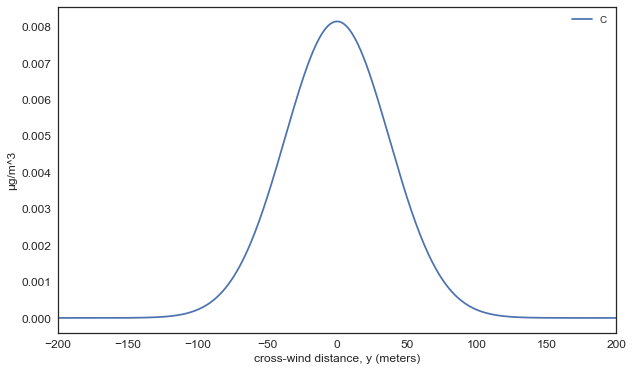

In [265]:
ax = data.plot(x="y", y="C", figsize=(10,6), fontsize=12)
ax.set_xlabel("cross-wind distance, y (meters)", fontsize=12)
ax.set_ylabel("μg/m^3", fontsize=12);

#### (c) At the position xmax and at y=0, plot the concentration versus height, z.

In [209]:
x = [385 for i in range(100)]
y = [0 for i in range(100)]
z = [i for i in range(100)]

In [210]:
data = pd.DataFrame()
data["x"] = x
data["y"] = y
data["z"] = z
data["sigmaY"] = 0.23*data["x"]**0.855 # in meters
data["sigmaZ"] = 0.076*data["x"]**0.879 # in meters
data["C"] = ((eRate*chlorineRatio*pccdRatio)/(2*np.pi*windSpeed* \
    data["sigmaY"]*data["sigmaZ"]))*np.exp(-data["y"]**2/(2* \
    data["sigmaY"]**2))*(np.exp(-(data["z"]-stackHeight)**2 \
    /(2*data["sigmaZ"]**2))+np.exp(-(data["z"]+
    stackHeight)**2/(2*data["sigmaZ"]**2)))

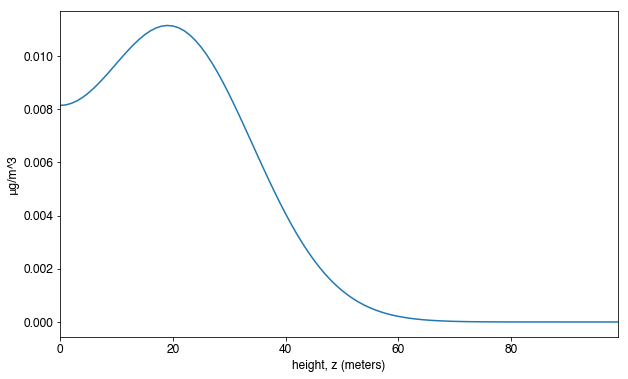

In [211]:
ax = data["C"].plot(figsize=(10,6), fontsize=12)
ax.set_xlabel("height, z (meters)", fontsize=12)
ax.set_ylabel("μg/m^3", fontsize=12);